In [57]:
'''Packages'''
from pickle import FALSE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In this lab I will examine the function  $z(x,y) = 3x^2 + xy + 2y^2 - x - 4y$ on the global minimum. The global minimum os easilly found via deriviatives and is $(0,1)$

In [58]:
'''Create data'''
z = []
x = []
y = []
for x_i in range(0,101):
    x = x_i/100
    for y_i in range(0,101):
        y = y_i/100
        z.append(3*x**2 + x*y + 2*y**2 - x - 4*y)

#Function to calculate z value
def determenisic(point):
    return 3*point[0]**2 + point[0]*point[1] + 2*point[1]**2 - point[0] - 4*point[1] 


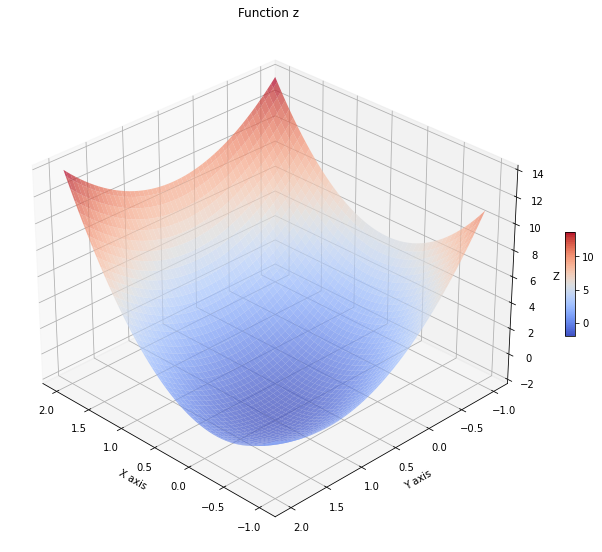

In [59]:
'''Plot function linespace'''
a_varianst = np.linspace(-1,2,100)
b_variants = np.linspace(-1,2,100)
[a_grid, b_grid] = np.meshgrid(a_varianst,b_variants)
f_grid =  determenisic([a_grid,b_grid])
fig = plt.figure(figsize= [12.8, 9.6])
graph = fig.add_subplot(111, projection='3d')
risunok = graph.plot_surface( a_grid,b_grid,f_grid, cmap=cm.coolwarm,alpha=0.7)
graph.view_init(30, 135)
graph.set_xlabel('X axis')
graph.set_ylabel('Y axis')
graph.set_zlabel('Z')
fig.colorbar(risunok, shrink=0.2, aspect=10)
plt.title("Function z")
plt.show()

In [60]:
'''Gradient descent code'''
def gradient_descent( num_iterations=1000, x_init = 1, y_init = 1, eps = 0.001,learn_rate = 0.001):
    x_list= [x_init]
    y_list = [y_init]
    point = np.array([x_init,y_init])

    for i in range(num_iterations):
        point0 = point
        grad_x, grad_y =  6*point[0] + point[1] - 1, point[0] + 4*point[1] - 4
        
        x_t = point[0] - learn_rate * grad_x
        y_t = point[1] - learn_rate * grad_y
        point = np.array([x_t,y_t])
        #stopping criteria
        if all(np.abs(point - point0) < eps):
            break
        
        x_list.append(x_t)
        y_list.append(y_t)
       
    return point, x_list, y_list

In [61]:
'''ADAM code'''
def ADAM(num_iterations=1000, x_init = 1, y_init = 1, eps = 0.0001,B_1 = 0.9, B_2 = 0.999 ,learn_rate = 0.001):
    x_list=[x_init]
    y_list=[y_init]
    point = np.array([x_init,y_init])

    S_t = np.array([0,0])
    V_t = np.array([0,0])
    for i in range(num_iterations):

        point0 = point
        g = np.array([6*point[0] + point[1] - 1, point[0] + 4*point[1] - 4])
        V_t1 = B_1*V_t + (1-B_1)*(g)
        S_t1 = B_2*S_t + (1-B_2)*(g**2)
        #it was not clear from the lecture what does gamma parameter means
        #S_t1_corr = S_t1/(1-??)
        V_t = V_t1
        S_t = S_t1

        point = point0 - learn_rate*V_t1/(np.sqrt(S_t1) + eps)

        x_list.append(point[0])
        y_list.append(point[1])
    return point, x_list, y_list

In [62]:
'''Get results'''
point_GD,x_list_GD, y_list_GD = gradient_descent( num_iterations=10000, x_init = 1, y_init = 1, eps = 0.00001,learn_rate = 0.01)
print("-2 - real minimum")
print(determenisic(point_GD), " - minimum according to gradient descent")

point_AD,x_list_AD, y_list_AD = ADAM(num_iterations=1000, x_init = 1, y_init = 1, eps = 0.0001,B_1 = 0.9, B_2 = 0.999 ,learn_rate = 0.001)
print(determenisic(point_AD), " - minimum according to ADAM")


-2 - real minimum
-1.9999998517997262  - minimum according to gradient descent
-1.9995007776692957  - minimum according to ADAM


In [63]:
'''Prepare resuts'''
GD_path = np.column_stack((x_list_GD,y_list_GD))
z_GD=[]
for i in range(0,len(GD_path)):
    z_GD.append(determenisic(GD_path[i]))
GD_path = np.column_stack((GD_path, z_GD))

AD_path = np.column_stack((x_list_AD,y_list_AD))
z_AD=[]
for i in range(0,len(AD_path)):
    z_AD.append(determenisic(AD_path[i]))
AD_path = np.column_stack((AD_path, z_AD))


x_list_GD_diff = np.diff(x_list_GD)
y_list_GD_diff = np.diff(y_list_GD)
x_list_AD_diff = np.diff(x_list_AD)
y_list_AD_diff = np.diff(y_list_AD)

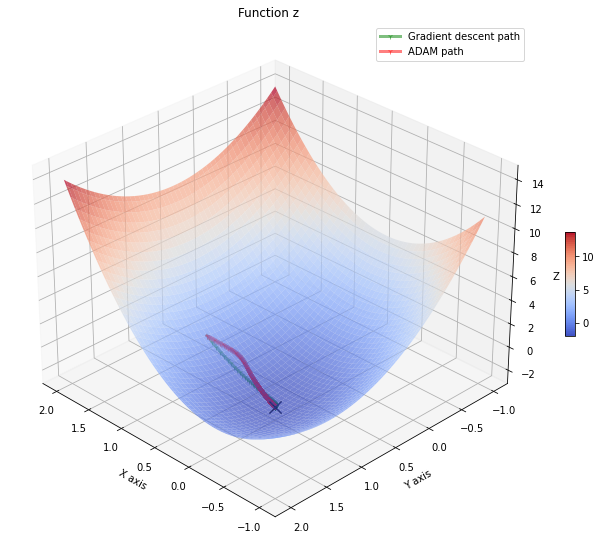

In [64]:
'''Plot paths'''
a_varianst = np.linspace(-1,2,100)
b_variants = np.linspace(-1,2,100)
[a_grid, b_grid] = np.meshgrid(a_varianst,b_variants)
f_grid =  determenisic([a_grid,b_grid])
fig = plt.figure(figsize= [12.8, 9.6])
graph = fig.add_subplot(111, projection='3d')
risunok = graph.plot_surface( a_grid,b_grid,f_grid, cmap=cm.coolwarm,alpha=0.7)
graph.view_init(30, 135)
graph.plot(x_list_GD,y_list_GD,z_GD, linewidth=3, marker='1',color='green', label='Gradient descent path', alpha=0.5)
graph.plot(x_list_AD,y_list_AD,z_AD, linewidth=3, marker='1',color='red', label='ADAM path', alpha=0.5)
graph.scatter(0, 1, -2, c='black',marker='x',s=150)
graph.set_xlabel('X axis')
graph.set_ylabel('Y axis')
graph.set_zlabel('Z')
fig.colorbar(risunok, shrink=0.2, aspect=10)
plt.title("Function z")
graph.legend()

plt.show()

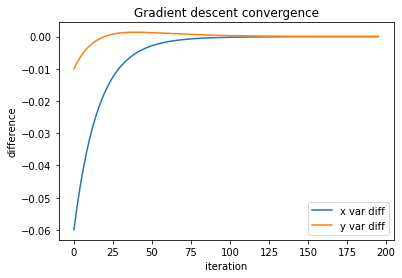

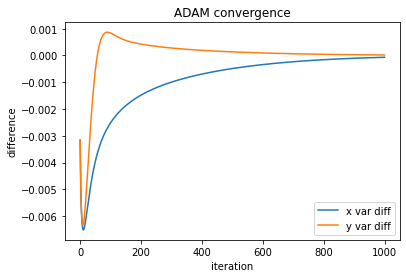

In [65]:
plt.plot(x_list_GD_diff, label = "x var diff")
plt.plot(y_list_GD_diff, label = "y var diff")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("difference")
plt.title("Gradient descent convergence")
plt.show()

plt.plot(x_list_AD_diff, label = "x var diff")
plt.plot(y_list_AD_diff, label = "y var diff")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("difference")
plt.title("ADAM convergence")
plt.show()